# SmartBridge Externship - Applied Data Science
## Assignment - 3
## June 2, 2023 - Friday

# House Price Prediction - Building a Regression Model

## Qn 1. Download the dataset: Dataset
## Qn 2. Load the dataset into the tool.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


In [30]:
data.shape

(545, 12)

## Qn 3. Perform Below Visualizations.
### Uni - Variate Analysis

d:\Users\Python\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Price')

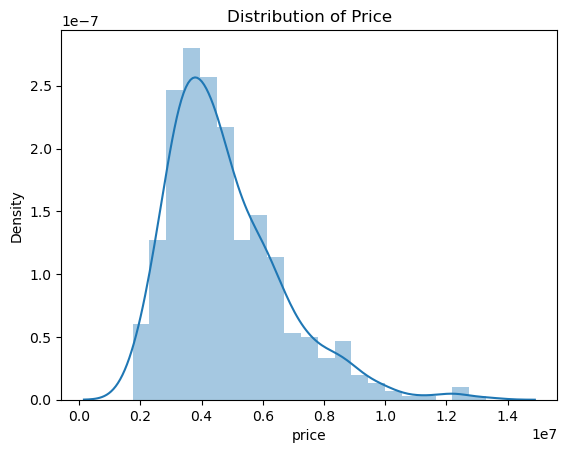

In [31]:
sns.distplot(data.price)
plt.title("Distribution of Price")

The distribution of Price column is left-skewed normal distribution 

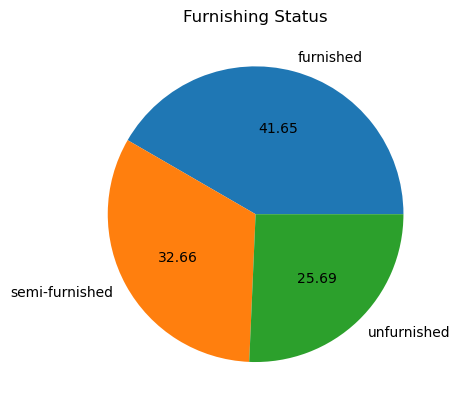

In [32]:
plt.pie(data['furnishingstatus'].value_counts(),
       labels=data['furnishingstatus'].unique(),
       autopct='%.2f')
plt.title("Furnishing Status")
plt.show()

From this pie chart we can understand that our dataset has 42% of furnished, 32% of semi-furnished and 26% of unfurnished house details

### Bi-Variate Analysis

Text(0.5, 1.0, 'Price based on Area')

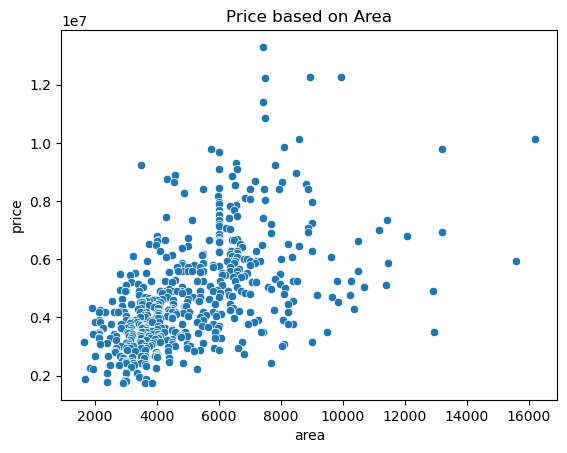

In [33]:
sns.scatterplot(x=data.area, y=data.price)
plt.title('Price based on Area')

Text(0.5, 1.0, 'Price based on Furnishing Status')

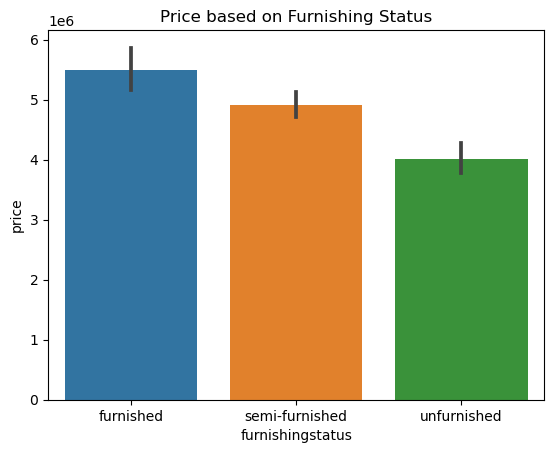

In [34]:
sns.barplot(x=data['furnishingstatus'],
            y=data['price'])
plt.title("Price based on Furnishing Status")

### Multi-Variate Analysis

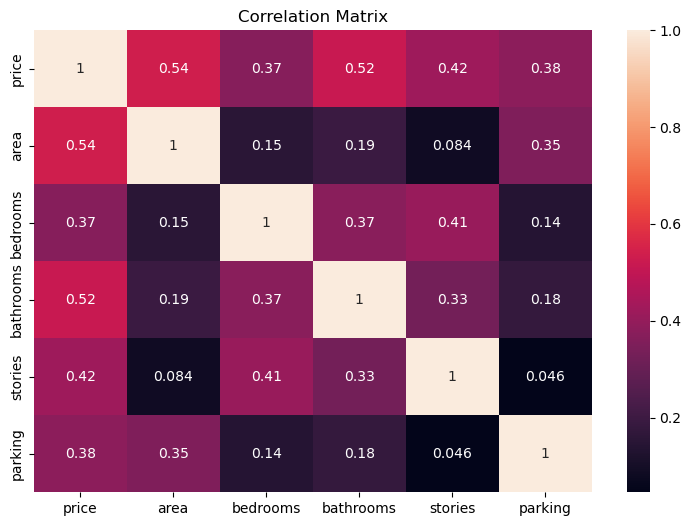

In [35]:
plt.figure(figsize=(9,6))
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

Text(0.5, 1.0, 'Pair plot')

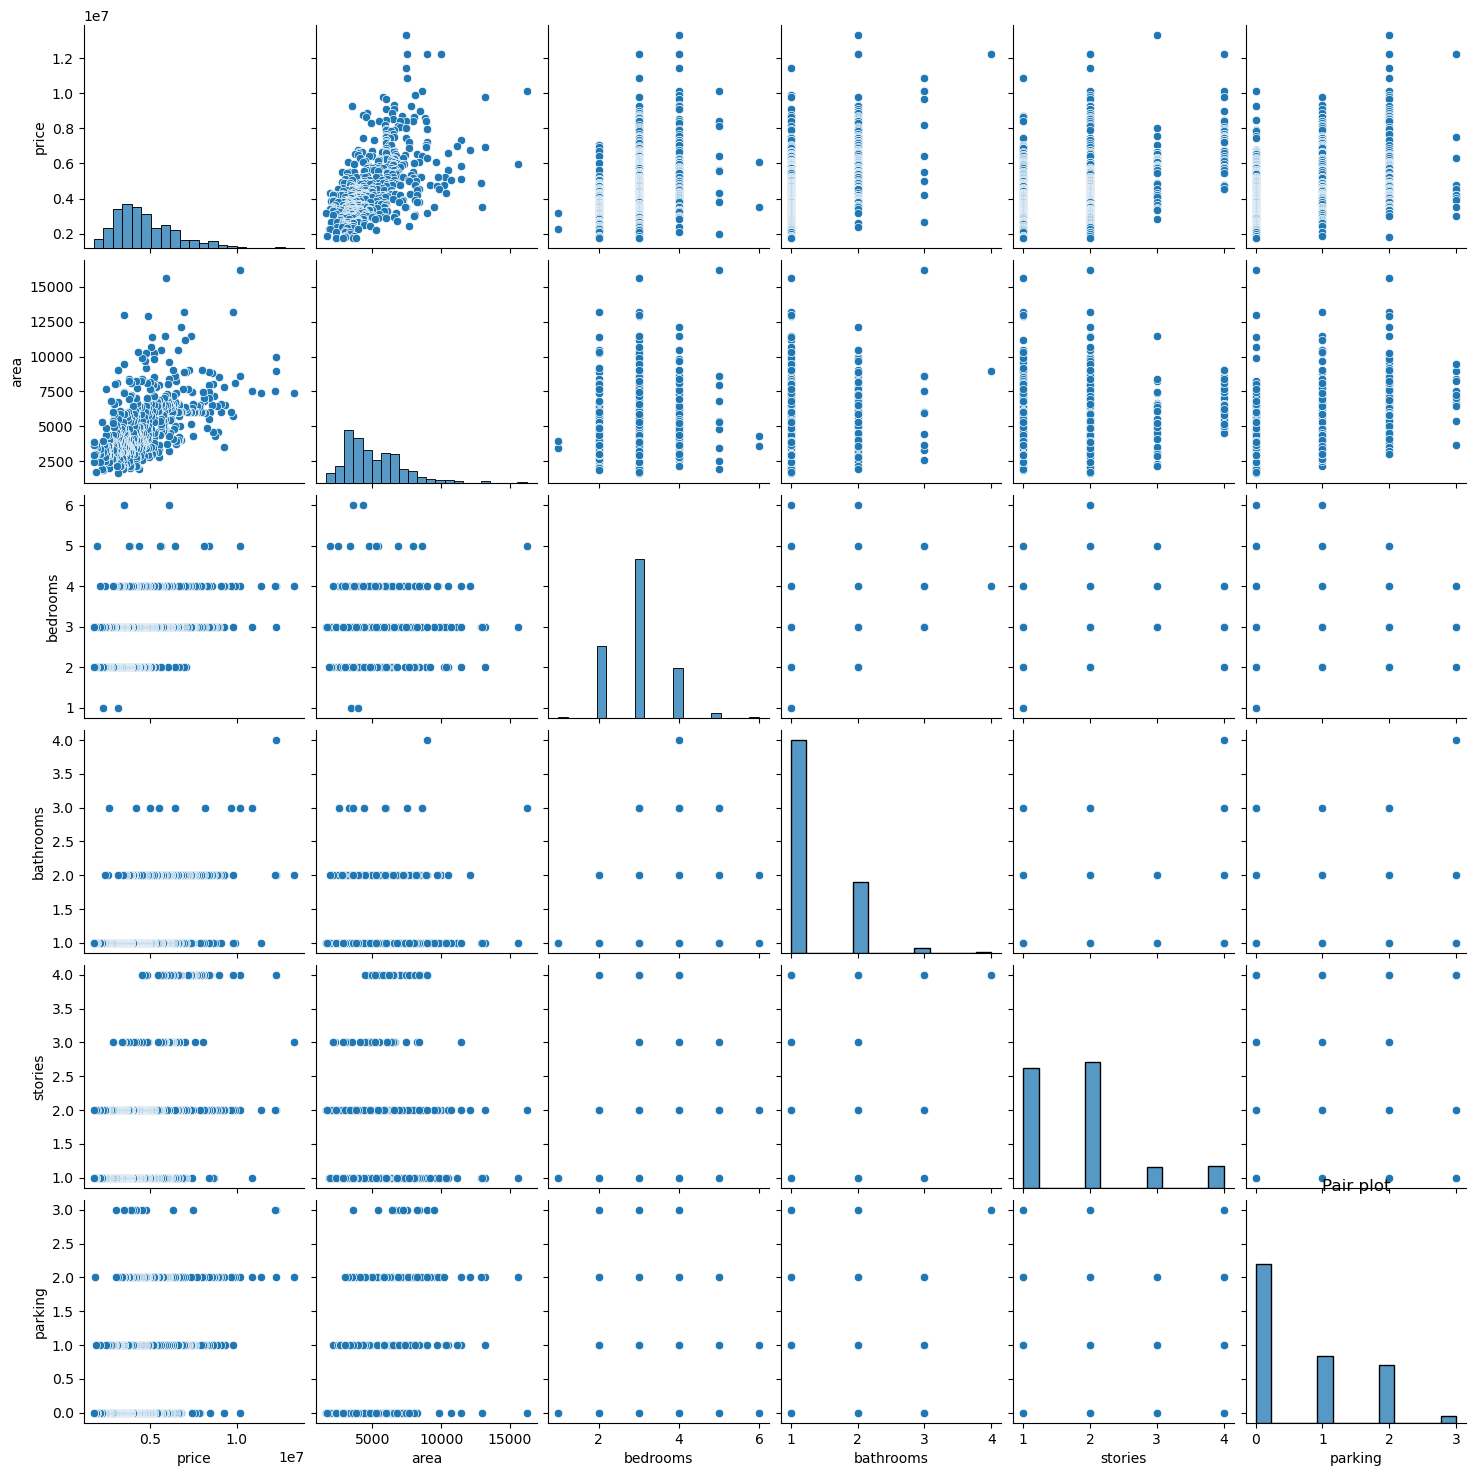

In [36]:
sns.pairplot(data)
plt.title("Pair plot")

## Qn 4. Perform descriptive statistics on the dataset.

In [37]:
data.mean()

C:\Users\Praveenram Rajkumar\AppData\Local\Temp\ipykernel_14356\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


price        4.766729e+06
area         5.150541e+03
bedrooms     2.965138e+00
bathrooms    1.286239e+00
stories      1.805505e+00
parking      6.935780e-01
dtype: float64

In [38]:
data.median()

C:\Users\Praveenram Rajkumar\AppData\Local\Temp\ipykernel_14356\4184645713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


price        4340000.0
area            4600.0
bedrooms           3.0
bathrooms          1.0
stories            2.0
parking            0.0
dtype: float64

In [39]:
data.mode()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,3500000,6000.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,semi-furnished
1,4200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
data.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [41]:
data.var()

C:\Users\Praveenram Rajkumar\AppData\Local\Temp\ipykernel_14356\445316826.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var()


price        3.498544e+12
area         4.709512e+06
bedrooms     5.447383e-01
bathrooms    2.524757e-01
stories      7.525432e-01
parking      7.423300e-01
dtype: float64

In [42]:
data.std()

C:\Users\Praveenram Rajkumar\AppData\Local\Temp\ipykernel_14356\2723740006.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.std()


price        1.870440e+06
area         2.170141e+03
bedrooms     7.380639e-01
bathrooms    5.024696e-01
stories      8.674925e-01
parking      8.615858e-01
dtype: float64

In [43]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Qn 5. Check for Missing values and deal with them

In [44]:
# checking for NAs
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

There are no NULL Values present in our dataset. Thus we can easily work with our dataset.

## Qn 6. Find the outliers and replace them outliers

Finding the Outliers


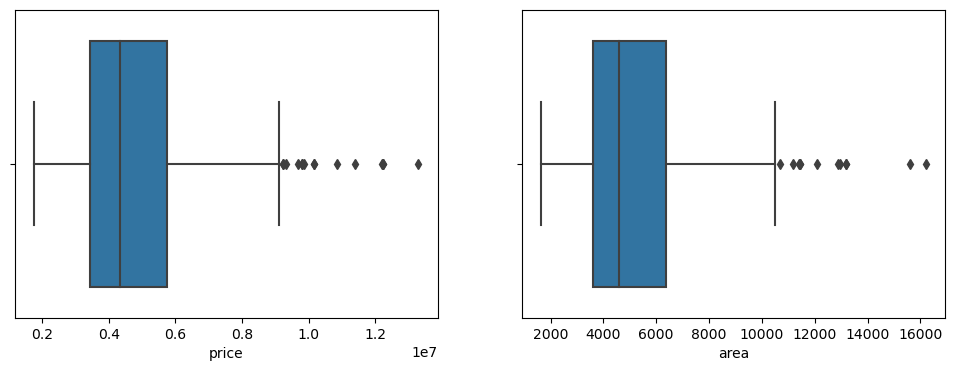

In [45]:
numeric_columns = ['price', 'area']
plt.figure(figsize=(12,4))
i=1
print("Finding the Outliers")
for column in numeric_columns:
    plt.subplot(1,2,i)
    i+=1
    sns.boxplot(x=data[column])

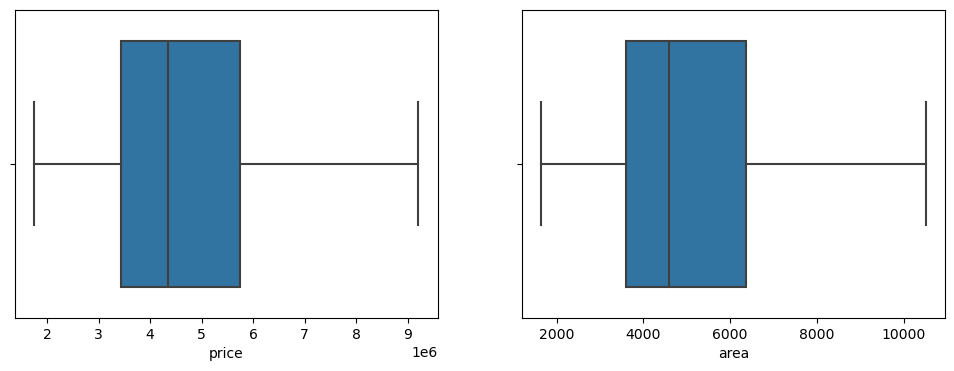

In [46]:
plt.figure(figsize=(12,4))
i=1
for column in numeric_columns:
    Q1, Q3 = data[column].quantile([.25, .75])
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    data[column] = np.where(
        data[column]>upper,
        upper, np.where(
            data[column]<lower, lower,
                        data[column]
        )
    )
    plt.subplot(1,2,i)
    i+=1
    sns.boxplot(x=data[column])

## Qn 7. Check for Categorical columns and perform encoding.

In [47]:
categoric_columns = data.select_dtypes(include='object').columns
categoric_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'furnishingstatus'],
      dtype='object')

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in categoric_columns:
    data[column] = le.fit_transform(data[column])
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,9205000.0,7420.0,4,2,3,1,0,0,0,1,2,0
1,9205000.0,8960.0,4,4,4,1,0,0,0,1,3,0
2,9205000.0,9960.0,3,2,2,1,0,1,0,0,2,1
3,9205000.0,7500.0,4,2,2,1,0,1,0,1,3,0
4,9205000.0,7420.0,4,1,2,1,1,1,0,1,2,0


## Qn 8. Split the data into Dependent and Independent

In [49]:
y = data['price']
X = data.drop(columns=['price'])

In [50]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,7420.0,4,2,3,1,0,0,0,1,2,0
1,8960.0,4,4,4,1,0,0,0,1,3,0
2,9960.0,3,2,2,1,0,1,0,0,2,1
3,7500.0,4,2,2,1,0,1,0,1,3,0
4,7420.0,4,1,2,1,1,1,0,1,2,0


In [51]:
y.head()

0    9205000.0
1    9205000.0
2    9205000.0
3    9205000.0
4    9205000.0
Name: price, dtype: float64

## Qn 9. Scale the independent Variables

In [52]:
from sklearn.preprocessing import StandardScaler
cols = X.columns
scaled = StandardScaler().fit_transform(X)
X = pd.DataFrame(scaled, columns=cols)
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,1.156583,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,-1.406286
1,1.925060,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-1.406286
2,2.424072,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.091662
3,1.196504,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,-1.406286
4,1.156583,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-1.406286
...,...,...,...,...,...,...,...,...,...,...,...
540,-1.049046,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.222962
541,-1.348453,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.091662
542,-0.739659,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,1.222962
543,-1.093957,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-1.406286


## Qn 10. Split the data into training and testing

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                test_size=0.2,
                                                random_state=42)

In [54]:
print(X_train.shape)
X_train.head()

(436, 11)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
46,0.447987,0.047278,1.421812,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,0.355976,-1.406286
93,1.046801,0.047278,1.421812,-0.929397,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,-0.091662
335,-0.641853,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,1.472618,1.517692,-1.406286
412,-1.243660,0.047278,-0.570187,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,-0.805741,1.222962
471,-0.674788,0.047278,-0.570187,0.224410,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,1.222962


In [55]:
print(y_train.shape)
y_train.head()

(436,)


46     7525000.0
93     6300000.0
335    3920000.0
412    3430000.0
471    3010000.0
Name: price, dtype: float64

In [56]:
print(X_test.shape)
X_test.head()

(109, 11)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
316,0.398086,1.403419,1.421812,0.224410,-2.465344,-0.465315,1.361397,-0.219265,-0.679063,0.355976,1.222962
77,0.697493,0.047278,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.805741,-1.406286
360,-0.530074,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.091662
90,-0.051024,0.047278,-0.570187,0.224410,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.805741,-0.091662
493,-0.569995,0.047278,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-1.406286


In [57]:
print(y_test.shape)
y_test.head()

(109,)


316    4060000.0
77     6650000.0
360    3710000.0
90     6440000.0
493    2800000.0
Name: price, dtype: float64

## Qn 11. Build the Model

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

## Qn 12. Train the Model

In [59]:
lr.fit(X_train,y_train)

LinearRegression()

In [60]:
lr.intercept_, lr.coef_

(4708495.781491917,
 array([ 548006.33963616,   75930.53006314,  474104.83104625,
         346100.17303221,  171160.96948441,  103759.29845828,
         221347.6992533 ,  144922.6133421 ,  345745.71095154,
         151616.10366583, -153983.86988499]))

## Qn 13. Test the Model

In [61]:
y_pred = lr.predict(X_test)
y_pred

array([5215154.81060095, 6675719.70641621, 3210585.63155314,
       4719348.1216706 , 3494112.11179584, 3844003.45060721,
       5837299.87684943, 5957697.38811311, 2745391.27972497,
       2658153.41177725, 8841079.55503709, 2979167.86492965,
       3173184.08483981, 3428370.56772898, 3955248.50258283,
       5067043.6022799 , 3052057.38643865, 4966513.49574212,
       4645490.66042896, 3746569.7059927 , 5321051.93476343,
       5554281.0446497 , 2901231.40512594, 4356163.12821942,
       5457165.80164233, 7092398.39430059, 3483565.40870114,
       5310536.96736101, 7242016.7003042 , 3527949.52170957,
       5854233.74056216, 3435010.62044493, 6810257.13103387,
       4417053.62117231, 3814426.53386575, 5730514.68900455,
       4966077.2134742 , 4586121.05305665, 3210525.89028568,
       4620063.37759807, 4743265.48292833, 3639970.08052502,
       6653842.80541868, 4135210.52951514, 3951665.65284458,
       4432760.21179709, 6735890.93270247, 4156075.12063828,
       4104734.42125273,

In [62]:
lr.score(X_test, y_test)

0.6681289959808645

## Qn 14. Measure the performance using Metrics.

In [63]:
from sklearn.metrics import r2_score, mean_squared_error
print('R2 Score - %.4f'%r2_score(y_test, y_pred))
print('MSE = %.4f'%mean_squared_error(y_test, y_pred))

R2 Score - 0.6681
MSE = 1340722973330.9463


In [64]:
from sklearn.metrics import mean_absolute_error
print('MAE = %.4f'%mean_absolute_error(y_test, y_pred))

MAE = 914853.5072
